In [9]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
import pandas as pd
from copy import deepcopy

d_color = {"bo": "#1f77b4", "random": "#ff7f0e", "local_search": "#2ca02c", "dfs": "#d62728", "bfs": "#9467bd"}

def plot_result(path: str, label: str, plot_kwargs: dict = None, median=False, cumulative=False, regret=True):
    plot_kwargs = deepcopy(plot_kwargs) or {}
    data_path_seeds = [f for f in os.listdir(path) if ".pt" in f]
    data_over_seeds = []
    for i, df in enumerate(data_path_seeds):
        data_path = os.path.join(path, df)
        with open(data_path, "rb") as fp:
            data = torch.load(data_path, map_location="cpu")
            minimize = False
        if "regret" in data.keys() and regret:
            y = -data["regret"].numpy().flatten()   # to maximize negative regret
            minimize = True
        else:
            assert "Y" in data.keys()
            y = data["Y"].numpy().flatten()
        data_over_seeds.append(y)
    n_data_per_trial = np.array([len(d) for d in data_over_seeds])
    max_len = max(n_data_per_trial)
    if len(np.unique(n_data_per_trial)) > 1:
        # pad as appropriate
        for i, d in enumerate(data_over_seeds):
            data_over_seeds[i] = np.concatenate((
                d, d[-1] * np.ones(max_len - d.shape[0])))
    all_data = np.array(data_over_seeds)
    if cumulative:
        y = pd.DataFrame(all_data).cummax(axis=1)
    else:
        y = pd.DataFrame(all_data)
    x = np.arange(all_data.shape[1])
    if median:
        mean = y.median(axis=0)
        lb = y.quantile(q=0.25, axis=0)
        ub = y.quantile(q=0.75, axis=0)
    else:
        mean = y.mean(axis=0)
        # standard error
        lb = mean - y.std(axis=0) / np.sqrt(all_data.shape[0])
        ub = mean + y.std(axis=0) / np.sqrt(all_data.shape[0])
    if minimize:
        mean = -mean
        lb = -lb
        ub = -ub
    plt.plot(x, mean, ".-", label=label, color=d_color[label], **plot_kwargs)
    if "alpha" in plot_kwargs.keys():
        del plot_kwargs["alpha"]
    if "markevery" in plot_kwargs.keys():
        del plot_kwargs["markevery"]
    plt.fill_between(x, lb, ub, alpha=0.1, **plot_kwargs)
    return y, max_len

/home/pierre/miniconda3/envs/graph/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


101


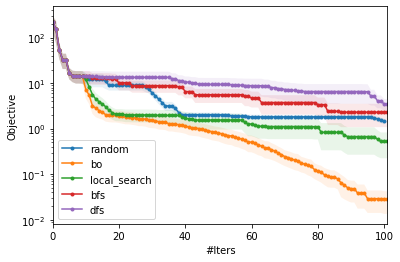

In [16]:

d_label = {"ei_ego_network_1":"bo", "random":"random", "local_search":"local_search", "dfs": "dfs", "bfs": "bfs"}

exp_dir = exp_dir = os.path.join(os.path.join("../logs", "testfunction"), "rosenbrock")
algorithm_name = [name for name in os.listdir(exp_dir) if os.path.isdir(os.path.join(exp_dir, name))]
min_max_len = np.inf
for algorithm in algorithm_name:
    alg_dir = os.path.join(exp_dir, algorithm)
    ## Here are in directory with signal png and pt
    y, max_len = plot_result(alg_dir, label=d_label[algorithm], median=False, cumulative=True)
    min_max_len = min(min_max_len, max_len)
print(min_max_len)
plt.legend()
plt.xlabel("#Iters")
plt.ylabel("Objective")
plt.xlim([0, min_max_len])
plt.yscale("log")
plt.savefig(os.path.join(exp_dir, "plot_result_regretpng.png"))
plt.savefig(os.path.join(exp_dir, "plot_result_regretpdf.pdf"))
plt.show()

In [5]:
exp_dir = os.path.join(os.path.join("./logs", "testfunction"), "rosenbrock")


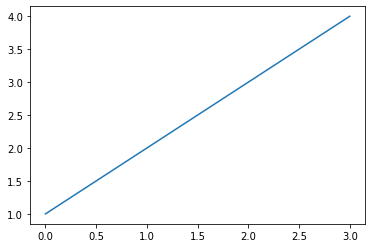

In [18]:
plt.plot([1,2,3,4], color = "#1f77b4")

In [ ]:
y, max_len = plot_result(alg_dir, label=d_label[algorithm], median=False, cumulative=True)